In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from numba import jit
import numpy as np
import matplotlib.pyplot as plt
# @jit(nopython=True)
def make_Bijk(N):
    Bijk = np.ones((N,N,N)) - np.eye(N)
    for i in range(N): Bijk[i,i,:]=0;Bijk[i,:,i]=0
    return Bijk

In [5]:
def RK4(f, y0, t, args=()):
    n = len(t)
    y = np.zeros((n, len(y0)))
    y[0] = y0

    for i in range(n - 1):
        h = t[i + 1] - t[i]
        k1 = f(y[i], t[i], *args)
        k2 = f(y[i] + k1 * h / 2.0, t[i] + h / 2.0, *args)
        k3 = f(y[i] + k2 * h / 2.0, t[i] + h / 2.0, *args)
        k4 = f(y[i] + k3 * h, t[i] + h, *args)
        y[i + 1] = y[i] + (h / 6.0) * (k1 + 2 * k2 + 2 * k3 + k4)
    return y

In [38]:
def Kuramoto_SOL_CHIMERA(Theta,t,omega,Bijk,K,N):
    # print("Case m = 0")
    theta = Theta.copy()
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=False,indexing='ij')
    i,j,k = np.meshgrid(theta,theta,theta,sparse=False,indexing='ij')
    # theta_i,theta_j = np.meshgrid(theta,theta,sparse=True)
    dtheta = omega + np.sum(np.sum(K*Bijk*np.sin(j+k-2*i),axis=2),axis=1)/N/N
    return dtheta

def get_order_parameter(theta):
    ''' get theta and return r and theta'''
    rpsi = np.mean(np.exp(1j*theta))
    r = np.abs(rpsi)
    psi = np.angle(rpsi)
    return r,psi


def Kuramoto_MF_CHIMERA(Theta,t,omega,K):
    # print("Case m = 0")
    theta = Theta.copy()
    r,psi = get_order_parameter(theta)
    dtheta  = omega + K*r*r*np.sin(2*(psi-theta))
    return dtheta

In [39]:
t = np.arange(0,300,0.1)
omega =  1

N = 50
Bijk = make_Bijk(N)
# Bijk2 = make_BIJK2(nu=nu,mu=mu,xi=xi,SS =SS,Nt = 2*N)
Theta = np.random.uniform(0,2*np.pi,N)
K = 2

In [40]:
sol = RK4(Kuramoto_SOL_CHIMERA,Theta,t,args=(omega,Bijk,K,N))
rabs2_1 = np.mean(np.exp(2*sol[:].T*1j),axis=0)
rabs2_2 = np.mean(np.exp(2*sol[:].T*1j),axis=0)
rabs1_1 = np.mean(np.exp(sol[:].T*1j),axis=0)
rabs1_2 = np.mean(np.exp(sol[:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1 = np.abs(rabs2_1)
r2_2 = np.abs(rabs2_2)

r1_1 = np.abs(rabs1_1)
r1_2 = np.abs(rabs1_2)

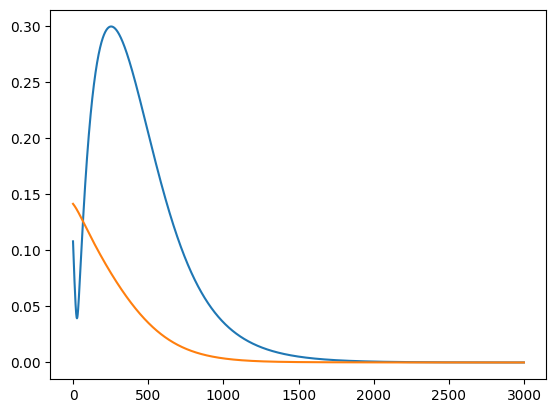

In [41]:
plt.plot(r2_1)
plt.plot(r1_1)

In [42]:
# Kuramoto_MF_CHIMERA(Theta,t,N1,omega,K111,K112,K122,beta):
t1 = np.arange(0,3000,0.1)

sol_MF = RK4(Kuramoto_MF_CHIMERA,Theta,t1,args=(omega,K))
# sol_MF = RK4(Kuramoto_MF_HO,Theta,t1,args=(N1,omega,K2,beta))
rabs2_1_MF = np.mean(np.exp(2*sol_MF[:].T*1j),axis=0)
rabs2_2_MF = np.mean(np.exp(2*sol_MF[:].T*1j),axis=0)
rabs1_1_MF = np.mean(np.exp(sol_MF[:].T*1j),axis=0)
rabs1_2_MF = np.mean(np.exp(sol_MF[:].T*1j),axis=0)

# rabs2_ = rabs2__[len(t)//2:]
r2_1_MF = np.abs(rabs2_1_MF)
r2_2_MF = np.abs(rabs2_2_MF)
r1_1_MF = np.abs(rabs1_1_MF)
r1_2_MF = np.abs(rabs1_2_MF)



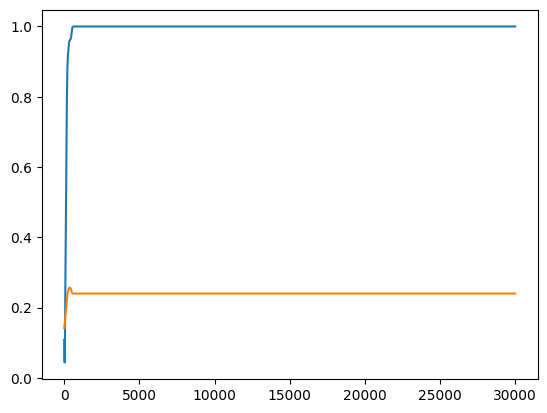

In [43]:
plt.plot(r2_1_MF)
plt.plot(r1_1_MF)

In [ ]:
|